<table>
 <tr align=left><td><img align=left src="https://mirrors.creativecommons.org/presskit/buttons/80x15/png/by.png">
 <td>This notebook is provided under the Creative Commons Attribution license, CC-BY 4.0. All code is made available under MIT License (c) Arash Sarshar.</td>
 <td> </td>
</table>

## Some ground rules for writing good responses in your assignments

* Make sure that you provide ample comments to communicate what you are trying to do clearly. Do not assume that anyone reading the code would immediately  understand the context.
* If you need to create new variables, think about naming them in descriptive ways.
* Each and every output should be reproducible. If you are creating a plot, make sure you include the code for that plot.
* Cite your references, including AI ones.


## Let's load the lemon picture again

In [15]:
import numpy as np
from numpy.linalg import *
from PIL import Image
import matplotlib.pyplot as plt

PIL stands for Python Imaging Library, and it provides the necessary tools and functions for handling images in Python. It is used for image processing, manipulation, and analysis.

In [16]:
image = np.array(Image.open('/content/lemon.jpeg'))

## Part 1

Write a block of commands that does the following.  

1. Print the shape of the image
1. Create a new variable called `img_single_channel` that is equivalent to __the last color channel__ of `image`
3. Print the shape of `img_single_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  `img_single_channel`





Shape of the image array: 
(100, 100, 3)
Shape of the last image array: 
(100, 100)


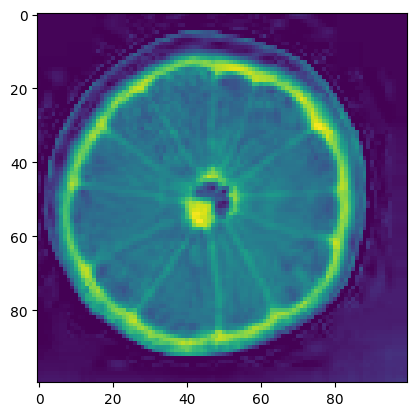

In [17]:
# Convert the image to an array
img_array = np.array(image)
print("Shape of the image array: ")
print(img_array.shape)

# Get the last color channel
img_single_channel = img_array[:, :, -1]  # -1 refers to the last channel

print("Shape of the last image array: ")  # Print the shape of img_single_channel
print(img_single_channel.shape)

plt.imshow(img_single_channel)
plt.show()

## Part 2

Write a block of commands that does the following.  

1. Create a new variable called `img_average_channel` that is equivalent to __the average of all three color channels__ of `image`
3. Print the shape of `img_average_channel` to check that it has the same number of pixels as the original image
4. Use `plt.imshow` to plot  the original image in `image`, compare the result with the result of `Part 1`, and comment on the differences and which one you would say is better

(100, 100)


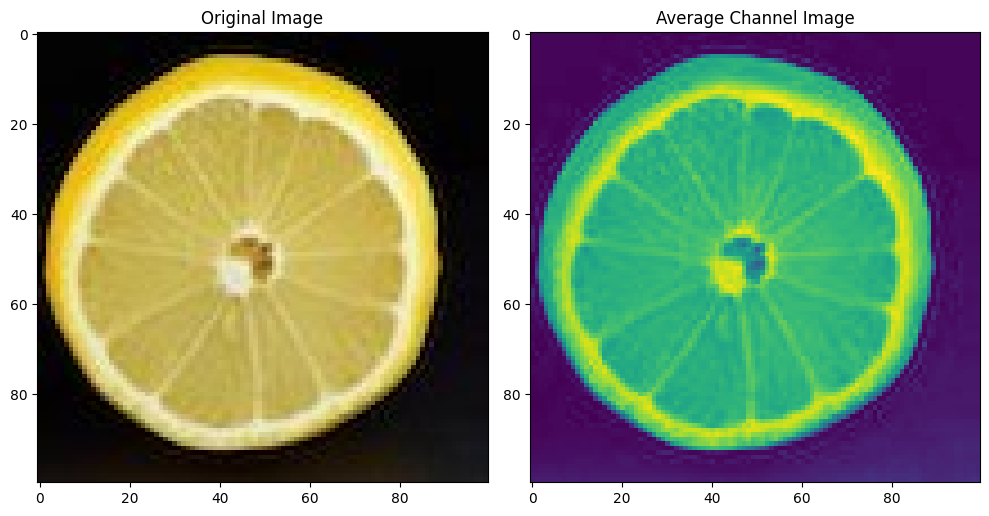

In [18]:
# Convert the image to an array
img_array = np.array(image)

# Average across the color channels
img_average_channel = img_array.mean(axis=2)

print(img_average_channel.shape)  # Print the shape of img_average_channel

plt.figure(figsize=(10,5))

# Original image
plt.subplot(1,2,1)
plt.imshow(image)
plt.title("Original Image")

# Averaged channel image
plt.subplot(1,2,2)
plt.imshow(img_average_channel)
plt.title("Average Channel Image")

plt.tight_layout()
plt.show()


The image appears to be pseudo-colored because the averaged channel employs a default colormap. The generated image will interpret the intensity values in the original image through that colormap rather than represent the original image's natural colors. Despite the fact that the underlying data is still a single-channel representation of the average of all three channels, this might cause the image to appear very different in terms of hue.

## Part 3

1. Describe what an identity matrix is. What does multiplying with an identity matrix do?
1. Create an identity matrix called `identity_matrix` that has the same size as `img_average_channel`.
2. Print a random row out of `identity_matrix` and describe your observations.

In [19]:
# Create identity matrix
identity_matrix = np.eye(img_average_channel.shape[0])

# Print a random row
random_row = np.random.randint(identity_matrix.shape[0])
print(identity_matrix[random_row])

# You'll observe that there is a "1" at the position that matches the row number, and zeros everywhere else.

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


**Identity Matrix -**
A square matrix with one on the major diagonal and zeros everywhere else is known as an identity matrix. A matrix's original form is obtained by multiplying it by an identity matrix.

## Part 4

We are going to use `identity_matrix` to scramble the rows and columns of `img_average_channel`.

1. First, create a numpy array that contains the numbers $0,1, \cdots, N$ where $N$ is the number of rows in the image.

2. Use `numpy.random.shuffle` to shuffle the indices. Call the shuffled array, `rows`

4. Print `rows` and inspect the elements.

In [20]:
rows = np.arange(img_average_channel.shape[0])
np.random.shuffle(rows)
print(rows)

[ 8 56  6 60 70 17 10 26 33 22 23 69 92 65 98  1 18 90 89 16 75 61 24 14
 95 41 66 45 12 28 30 62 88 59 78 29 87 51 86 49 48  0 68 57 37 53 35 74
 58 13 85 43 76 94 36 34 64 97 84 44 73 40 83 39 19 54  2  7 79  9 55 11
 96 27 52 82 99 38  5  3 15 71 31 81 77  4 67 47 63 42 80 91 20 32 93 72
 46 50 21 25]


## Part 5

1. Use your array of random row indices to create a new matrix `T` from `identity_matrix`. Overall, `T` has the same elements as `identity_matrix`, but the order of the rows of `T` should be according to the variable `rows`
2. Take a moment to think about what we are doing here. Describe in your own words what matrix `T` is.
3. Sanity check, print the shape of `T` and make sure it is the same size as `identity_matrix` and `img_average_channel`. If you need to,  reshape it to have the same size.


In [21]:
T = identity_matrix[rows]
print(T.shape)  # Print the shape of T

# Matrix T is basically the identity matrix, but its rows have been shuffled randomly.

(100, 100)


Matrix T is a permutation of the identity matrix. A permutation matrix is a square matrix obtained by permuting the rows of an identity matrix. It retains the properties of the identity matrix but has its rows reordered. When you multiply another matrix by this permutation matrix, it will reorder (shuffle) the rows of that other matrix according to the permutation used to create T.



## Part 6

1. Matrix multiply `T` and `img_average_channel` and store the result in `transformed_image`. Check the shape of the result.
2. Plot `transformed_image` and describe the pattern you see.
3. Think about what each dot product in the matrix multiplication is doing. Describe in your own words what this transformation is doing to the original image.

(100, 100)


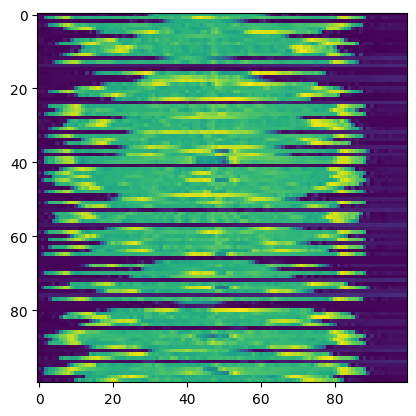

In [22]:
transformed_image = np.dot(T, img_average_channel)

print(transformed_image.shape)  # Print the shape of transformed_image

plt.imshow(transformed_image)
plt.show()

# This transformation scrambles the rows of the original image.

In matrix multiplication, when we multiply matrix \( T \) (a permutation matrix) with `img_average_channel` (the grayscale representation of our image), each row of the resulting `transformed_image` is determined by the dot product of the rows of \( T \) and the original image. Since \( T \) is derived from a shuffled identity matrix, each dot product essentially selects a specific row from `img_average_channel`. This means the transformation operation reorders the rows of the grayscale image according to the shuffled order in \( T \). Thus, the image's content remains the same, but its structure appears "scrambled" or rearranged based on the permutation encoded in matrix \( T \).

## Part 7

1. We now want to retrieve the original image. Is matrix `T` invertible? How would you show that it is invertible?
2. Compute the inverse and store the matrix in `Tinv`.
3. Perform the inverse of the scrambling operation and plot the result to show that you retrieved the original image.

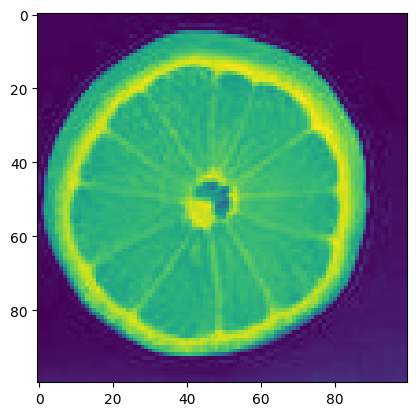

In [23]:
from numpy.linalg import inv

# Check if T is invertible by looking at its determinant.
# If determinant is non-zero, it's invertible.
if np.linalg.det(T) != 0:
    Tinv = inv(T)
    original_image_retrieved = np.dot(Tinv, transformed_image)
    plt.imshow(original_image_retrieved)
    plt.show()


## Part 8: Extra Points

* We want to perform the same operations but on the columns of the original image. How would you do the matrix algebra? Plot the scrambled image for the proof of concept.


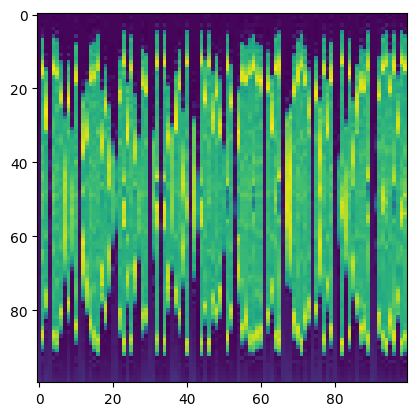

In [24]:
cols = np.arange(img_average_channel.shape[1])
np.random.shuffle(cols)
T_cols = identity_matrix[cols]
transformed_image_cols = np.dot(img_average_channel, T_cols.T)

plt.imshow(transformed_image_cols)
plt.show()

# This transformation scrambles the columns of the original image.


## Extra Points

* Now can you perform the scrambling on __both the columns and rows__ of the original image?  Write the code and plot the scrambled image. Then invert the operations and show that you can recover the original image.

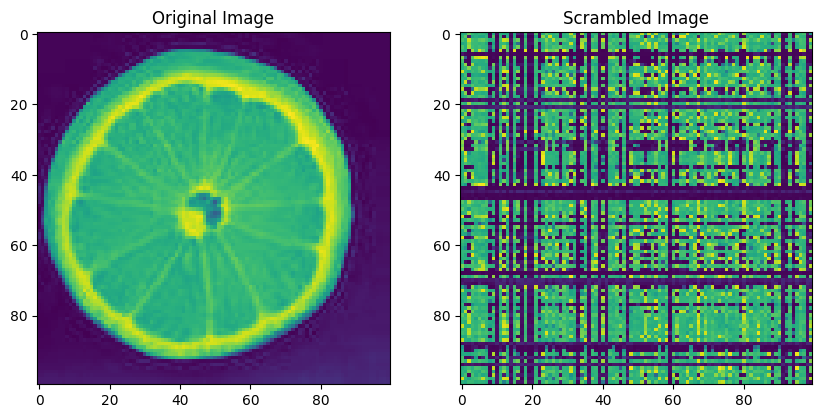

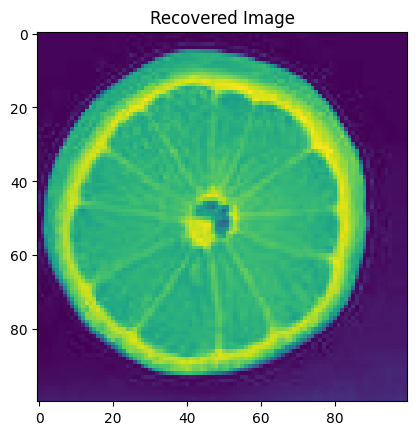

In [28]:
# Creating the identity matrices for rows and columns
identity_matrix_rows = np.eye(img_average_channel.shape[0])
identity_matrix_cols = np.eye(img_average_channel.shape[1])

# Shuffling row and column indices
rows = np.arange(img_average_channel.shape[0])
np.random.shuffle(rows)
cols = np.arange(img_average_channel.shape[1])
np.random.shuffle(cols)

# Deriving permutation matrices for rows and columns
T_rows = identity_matrix_rows[rows]
T_cols = identity_matrix_cols[cols]

# Scrambling the image
scrambled_image = np.dot(T_rows, np.dot(img_average_channel, T_cols))

# Plotting the scrambled image
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img_average_channel)
plt.title("Original Image")
plt.subplot(1, 2, 2)
plt.imshow(scrambled_image)
plt.title("Scrambled Image")
plt.show()

# Recovering the original image
T_rows_inv = inv(T_rows)
T_cols_inv = inv(T_cols)

recovered_image = np.dot(T_rows_inv, np.dot(scrambled_image, T_cols_inv))

# Plotting the recovered image
plt.imshow(recovered_image)
plt.title("Recovered Image")
plt.show()
